## VOLATILITY
##### Se analizará la intensidad de los cambios del precio (cierre) durante los útltimos 10 años de la empresa Starbucks.
##### La volatilidad es sinónimo de la desviación estándar de los precios (disperción).
##### Ojo: la volatilidad solo mide variación pero no dirección, una acción con una volatilidad diaria del 3% no quiere decir necesariamente que aumentó en un 3%, también puede haber ocurrido que subió un 2% hasta la media sesión pero en lo que quedaba del día bajó un 1% (este ejemplo puede ser llevado a un horizonte anual).

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# para graficar
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# obteniendo la data de SBUX
df = pdr.get_data_yahoo('SBUX', period='10y')

# obteniendo los retornos o cambios porcentuales diarios
returns = (df['Adj Close'].pct_change()).dropna()
returns 

[*********************100%***********************]  1 of 1 completed


Date
2013-02-26 00:00:00-05:00    0.001316
2013-02-27 00:00:00-05:00    0.024211
2013-02-28 00:00:00-05:00    0.005131
2013-03-01 00:00:00-05:00    0.000365
2013-03-04 00:00:00-05:00    0.015126
                               ...   
2023-02-16 00:00:00-05:00   -0.013394
2023-02-17 00:00:00-05:00   -0.004092
2023-02-21 00:00:00-05:00   -0.021662
2023-02-22 00:00:00-05:00   -0.000095
2023-02-23 00:00:00-05:00   -0.009449
Name: Adj Close, Length: 2517, dtype: float64

In [11]:
# vista rápida de la principal info de los retornos diarios
returns.describe(percentiles = [0.75, 0.90])

count    2517.000000
mean        0.000744
std         0.016313
min        -0.162043
50%         0.000714
75%         0.008584
90%         0.016551
max         0.147303
Name: Adj Close, dtype: float64

##### Considerando los 10 años de data, el promedio de la variación diaria es de 0.0744%, con una desviación estándar del 1.6%, se infiere que, en el 68% de los casos el retorno de la acción fluctúo entre -1.557% y los 1.7%.

### Historical Volatility

In [16]:
# la volatilidad corresponde a la desviación estándar anualizada, cada año cuenta con 252 trading days
daily_std = returns.std()
annualized_std =  daily_std* np.sqrt(252)
annualized_std

0.2589672398208266

### Rolling Volatility

In [17]:
# sabiendo que la volatilidad no es estatita y va cambiando en cada sesión de trading
# ".rolling" para que se vayan engloban las últimas 21 secciones de trading (1 mes, sin considerar fin de semanas)
volatility = returns.rolling(window = 21).std()*np.sqrt(252)
volatility.tail()

Date
2023-02-16 00:00:00-05:00    0.213284
2023-02-17 00:00:00-05:00    0.212039
2023-02-21 00:00:00-05:00    0.225471
2023-02-22 00:00:00-05:00    0.221946
2023-02-23 00:00:00-05:00    0.223520
Name: Adj Close, dtype: float64

In [18]:
volatility.describe()

count    2497.000000
mean        0.227822
std         0.127756
min         0.082961
25%         0.151040
50%         0.201403
75%         0.260716
max         1.223358
Name: Adj Close, dtype: float64

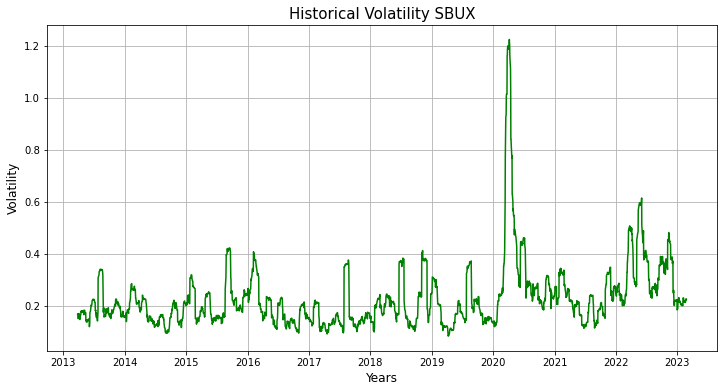

In [19]:
# plot
plt.figure(figsize = (12, 6)) # tamaño del gráfico
plt.plot(volatility, color='green')
plt.title('Historical Volatility SBUX', fontsize = 15) # título
plt.ylabel('Volatility', fontsize = 12) # etiqueta eje y
plt.xlabel('Years', fontsize = 12) # etiqueta eje x
plt.grid() # cuadrículas
plt.show()